In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
import pandas as pd

path = "/content/drive/MyDrive/sample_sales_data.csv"
df = pd.read_csv(path)

# Dataset is now stored in a Panda DataFrame
df.describe

<bound method NDFrame.describe of       Unnamed: 0                        transaction_id            timestamp  \
0              0  a1c82654-c52c-45b3-8ce8-4c2a1efe63ed  2022-03-02 09:51:38   
1              1  931ad550-09e8-4da6-beaa-8c9d17be9c60  2022-03-06 10:33:59   
2              2  ae133534-6f61-4cd6-b6b8-d1c1d8d90aea  2022-03-04 17:20:21   
3              3  157cebd9-aaf0-475d-8a11-7c8e0f5b76e4  2022-03-02 17:23:58   
4              4  a81a6cd3-5e0c-44a2-826c-aea43e46c514  2022-03-05 14:32:43   
...          ...                                   ...                  ...   
7824        7824  6c19b9fc-f86d-4526-9dfe-d8027a4d13ee  2022-03-03 18:22:09   
7825        7825  1c69824b-e399-4b79-a5e7-04a3a7db0681  2022-03-04 19:14:46   
7826        7826  79aee7d6-1405-4345-9a15-92541e9e1e74  2022-03-03 14:00:09   
7827        7827  e5cc4f88-e5b7-4ad5-bc1b-12a828a14f55  2022-03-04 15:11:38   
7828        7828  afd70b4f-ee21-402d-8d8f-0d9e13c2bea6  2022-03-06 13:50:36   

                 

In [ ]:
df.drop(columns=["Unnamed: 0"], inplace=True, errors='ignore')
df.head()
#df.tail()

In [9]:
# descriptive statistics of numerical columns
df.describe()

,unit_price,quantity,total
count,7829.000000,7829.000000,7829.000000
mean,7.819480,2.501597,19.709905
std,5.388088,1.122722,17.446680
min,0.190000,1.000000,0.190000
25%,3.990000,1.000000,6.570000
50%,7.190000,3.000000,14.970000
75%,11.190000,4.000000,28.470000
max,23.990000,4.000000,95.960000


The Column: category has 22 unique values

fruit                    998
vegetables               846
packaged foods           507
baked goods              443
canned foods             431
refrigerated items       425
kitchen                  382
meat                     382
dairy                    375
beverages                301
cheese                   293
cleaning products        292
baking                   264
snacks                   263
frozen                   263
seafood                  253
medicine                 243
baby products            224
condiments and sauces    181
personal care            177
pets                     161
spices and herbs         125
Name: category, dtype: int64


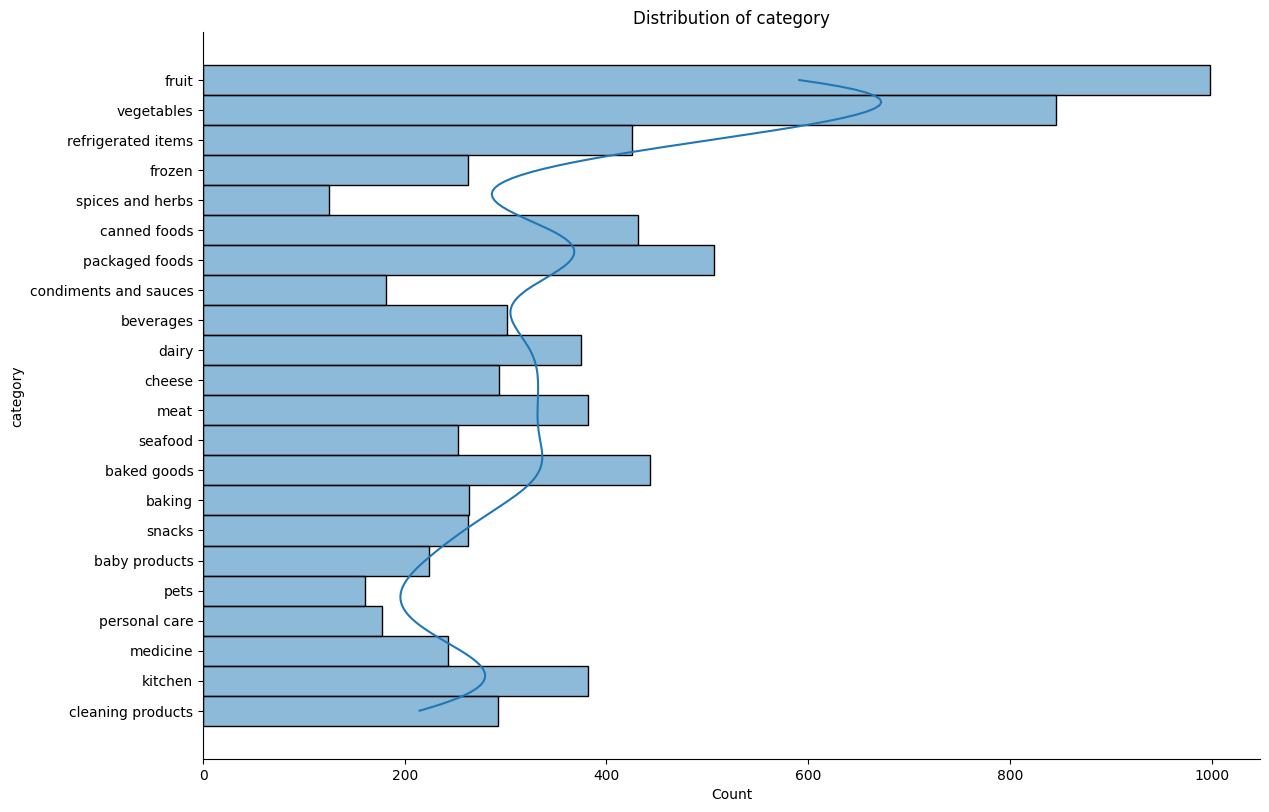

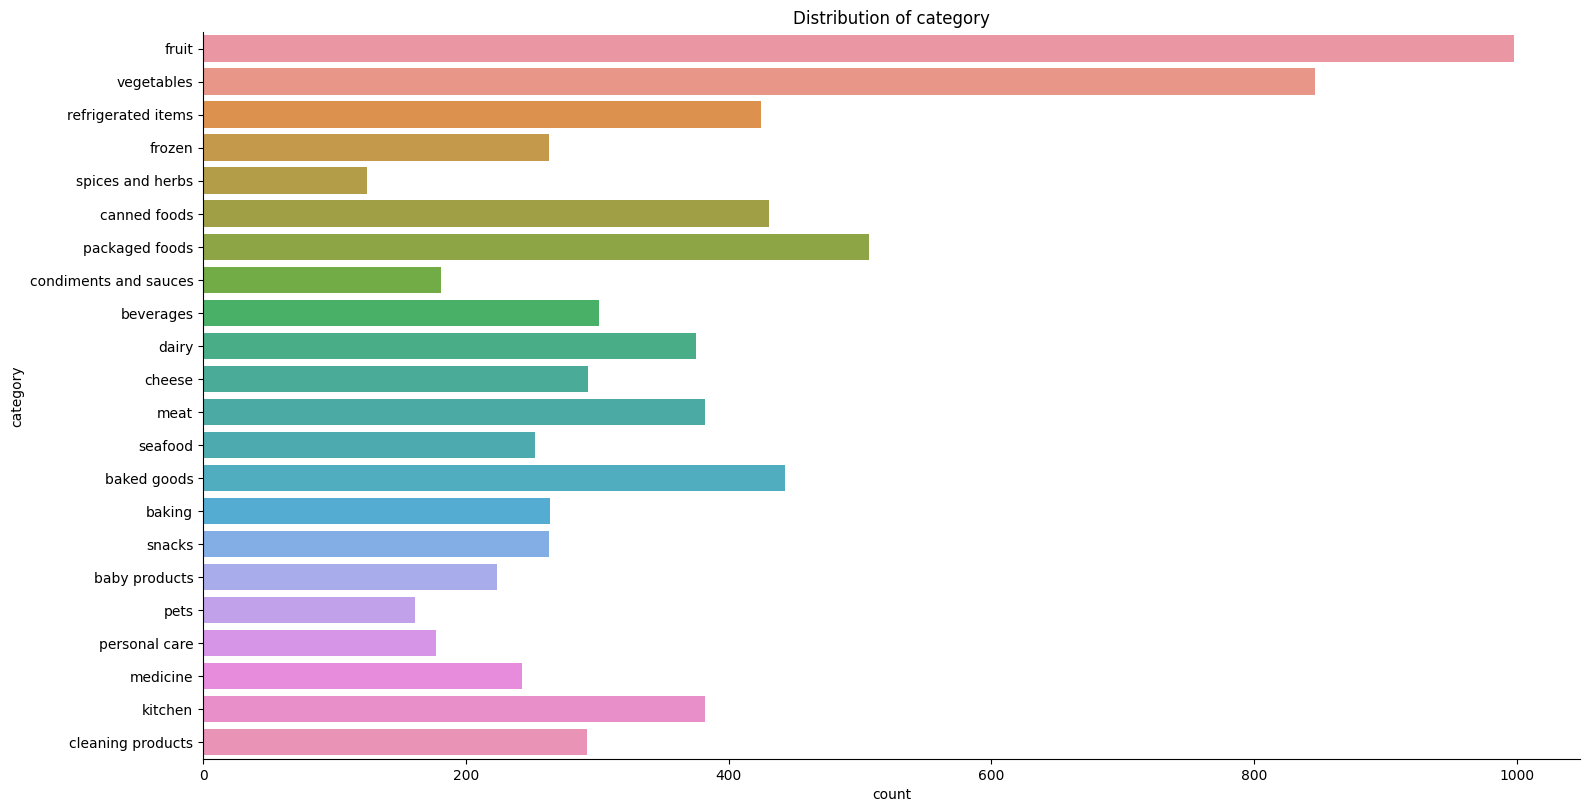

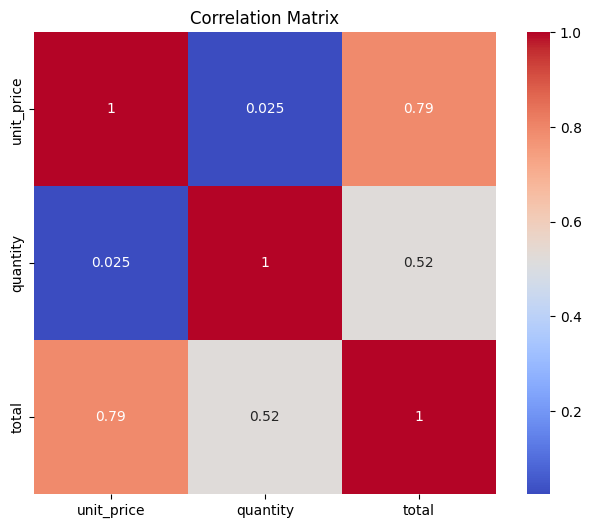

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_continuous_distribution(data: pd.DataFrame = None, column: str = None, height: int = 8):
  _ = sns.displot(data, y=column, kde=True, height=height, aspect=height/5).set(title=f'Distribution of {column}');
#I changed the column(category) above to ensure that the category is printed vertically to ensure readability

def get_unique_values(data, column):
  num_unique_values = len(data[column].unique())
  value_counts = data[column].value_counts()
  print(f"The Column: {column} has {num_unique_values} unique values\n")
  print(value_counts)

def plot_categorical_distribution(data: pd.DataFrame = None, column: str = None, height: int = 8, aspect: int = 2):
  _ = sns.catplot(data=data, y=column, kind='count', height=height, aspect=aspect).set(title=f'Distribution of {column}');
#Also changed the column(category) above

def correlation_plot(data: pd.DataFrame = None):
  corr = df.select_dtypes(include=['number']).corr()
  #corr.style.background_gradient(cmap='coolwarm')
  plt.figure(figsize=(8, 6))
  sns.heatmap(corr, annot=True, cmap='coolwarm', square=True)
  plt.title('Correlation Matrix')
  plt.show()



#Create calls for the functions to find out what i wanted
plot_continuous_distribution(data=df, column='category')
get_unique_values(df,'category')
plot_categorical_distribution(data=df, column='category')

#To get only the numeric values in the dataframe
correlation_plot(data=df)
#print(numeric_columns) #Confirmed that only numeric values where being printed